In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")



PyTorch version: 2.8.0+cu126
CUDA available: True
Number of GPUs: 1
GPU name: NVIDIA GeForce RTX 2050


In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets, layers, models
import numpy as np
# Load the MNIST dataset
(x_train , y_train), (x_test, y_test) = mnist.load_data()

c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [3]:
# 2. Preprocess data
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# 3. Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes for digits 0–9
])

c:\Users\rrpra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 4. Compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# 5. Train model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.8)

# 6. Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8817 - loss: 0.3836 - val_accuracy: 0.9547 - val_loss: 0.1417
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9667 - loss: 0.1065 - val_accuracy: 0.9736 - val_loss: 0.0880
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9783 - loss: 0.0716 - val_accuracy: 0.9777 - val_loss: 0.0707
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9844 - loss: 0.0475 - val_accuracy: 0.9750 - val_loss: 0.0821
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9878 - loss: 0.0389 - val_accuracy: 0.9803 - val_loss: 0.0676
313/313 - 1s - 2ms/step - accuracy: 0.9829 - loss: 0.0527
Test Accuracy: 0.9829


In [5]:
test_prediction = model.predict(x_test)
predicted_labels = np.argmax(test_prediction, axis=1)
predicted_labels.shape
classes = 10
conf_matrix = np.zeros((classes, classes), dtype=int)
np.add.at(conf_matrix, (predicted_labels,y_test),1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [6]:
print('|'.rjust(7) ,'|'.join(map(lambda x:str(x).center(5,' '), range(10))), '| total')
print('='*75)
for i in range(len(conf_matrix)):
    print(str(i).center(5),'|', '|'.join(map(lambda x:str(x).center(5,' '), conf_matrix[i])),'|', conf_matrix[i].sum())
print('='*75)
print('total |' ,'|'.join(map(lambda x:str(x).center(5,' '), conf_matrix.sum(axis=0))))



      |   0  |  1  |  2  |  3  |  4  |  5  |  6  |  7  |  8  |  9   | total
  0   |  965 |  0  |  1  |  0  |  0  |  1  |  3  |  1  |  0  |  1   | 972
  1   |   0  | 1133|  5  |  0  |  0  |  0  |  3  |  6  |  0  |  3   | 1150
  2   |   0  |  0  | 1001|  2  |  0  |  1  |  0  |  9  |  1  |  0   | 1014
  3   |   0  |  1  |  0  | 997 |  0  |  4  |  0  |  0  |  0  |  2   | 1004
  4   |   2  |  0  |  2  |  0  | 978 |  1  |  5  |  0  |  1  |  10  | 999
  5   |   0  |  0  |  0  |  3  |  0  | 874 |  1  |  0  |  0  |  4   | 882
  6   |   7  |  0  |  2  |  0  |  0  |  2  | 940 |  0  |  0  |  0   | 951
  7   |   1  |  1  |  8  |  3  |  1  |  1  |  0  | 1009|  4  |  8   | 1036
  8   |   4  |  0  |  13 |  4  |  0  |  5  |  6  |  2  | 966 |  15  | 1015
  9   |   1  |  0  |  0  |  1  |  3  |  3  |  0  |  1  |  2  | 966  | 977
total |  980 | 1135| 1032| 1010| 982 | 892 | 958 | 1028| 974 | 1009


In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumit17125/handwritten-images-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rrpra\.cache\kagglehub\datasets\sumit17125\handwritten-images-dataset\versions\1


In [8]:
import os
imgpath = r'C:\\Users\\rrpra\\.cache\\kagglehub\\datasets\\sumit17125\\handwritten-images-dataset\\versions\\1\\Handwritten_equations\\Handwritten_equations\\Handwritten\\Dataset'
os.listdir(r'C:\\Users\\rrpra\\.cache\\kagglehub\\datasets\\sumit17125\\handwritten-images-dataset\\versions\\1\\Handwritten_equations\\Handwritten_equations\\Handwritten\\Dataset')[:5]

['101_alfonso.bmp',
 '101_carlos.bmp',
 '101_caue.bmp',
 '101_danilo.bmp',
 '101_david.bmp']

In [ ]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

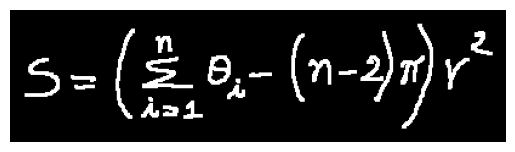

In [25]:

img = os.listdir(imgpath)[0]

i = Image.open(os.path.join(imgpath,img))
cv2_img = np.array(i)
cv2_img.shape

mask = cv2_img > 140
cv2_img[mask] = 255
cv2_img[~mask] = 0
plt.imshow(cv2_img, cmap="gray")   # show in grayscale
plt.axis("off")                   # hide axis ticks
plt.show()



In [29]:
mask = cv2_img > 140
cv2_img[mask] = 255
cv2_img[~mask] = 0
print(mask.shape)
coords = np.argwhere(mask)
print(coords[0])

(109, 409)
[ 12 336]


In [60]:

min_width = -1

for j in range(mask.shape[1]):
    found= False
    for i in range(mask.shape[0]):
        if mask[i][j]:
            if min_width == -1:
                min_width = j
            found = True

    if min_width != -1:
        max_width = j
        if found == False:
            break
min_height = -1
for i in range(mask.shape[0]):
    found = False
    for j in range(min_width, max_width):
        if mask[i][j]:
            if min_height == -1:
                min_height = i
            found = True

    if min_height!= -1:
        max_height = i
        if found == False:
            break
print(min_height,max_height, min_width,max_width)
new_img = cv2_img[min_height:max_height, min_width:max_width]
new_img.shape

40 72 12 41


(32, 29)

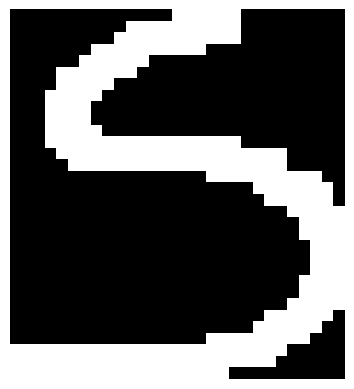

In [57]:


plt.imshow(new_img, cmap="gray")   # show in grayscale
plt.axis("off")                   # hide axis ticks
plt.show()


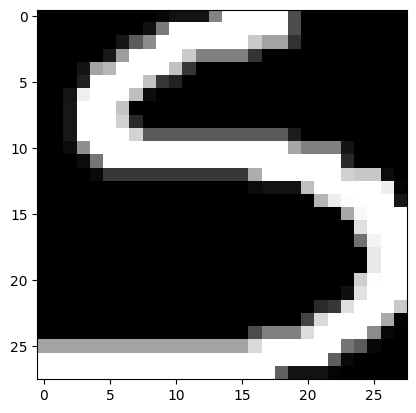

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


np.int64(7)

In [61]:
img = cv2.resize(new_img, (28, 28))
plt.imshow(img, cmap='gray')
plt.show()
np.argmax(model.predict(img.reshape(-1, 28, 28, 1).astype("float32") / 255.0))

In [62]:
import cv2
import numpy as np

def extract_digits(img, threshold=140):
    """
    Extract multiple digits from a grayscale image.
    Returns list of cropped digit images.
    """
    # Step 1: Binarize
    _, thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

    # Step 2: Find contours (connected components)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    digits = []
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        digit = img[y:y+h, x:x+w]
        digits.append((x, digit))  # keep x for sorting

    # Step 3: Sort left-to-right
    digits = [d for _, d in sorted(digits, key=lambda x: x[0])]
    return digits


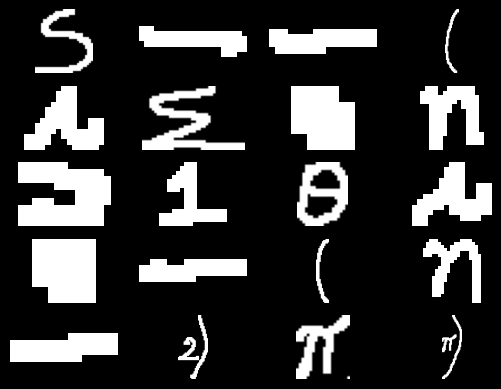

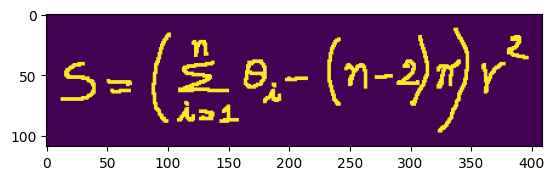

In [71]:
digits = extract_digits(cv2_img)
fig, axes = plt.subplots(5,len(digits)//5)
fig.patch.set_facecolor("black") 
for i, d in enumerate(axes.flatten()):
    d.imshow(digits[i], cmap="gray")
    #d.title(f"Digit {i+1}")
    d.axis("off")

plt.show()
plt.imshow(cv2_img)
plt.show()
